In [134]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [135]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [136]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

<IPython.core.display.Javascript object>


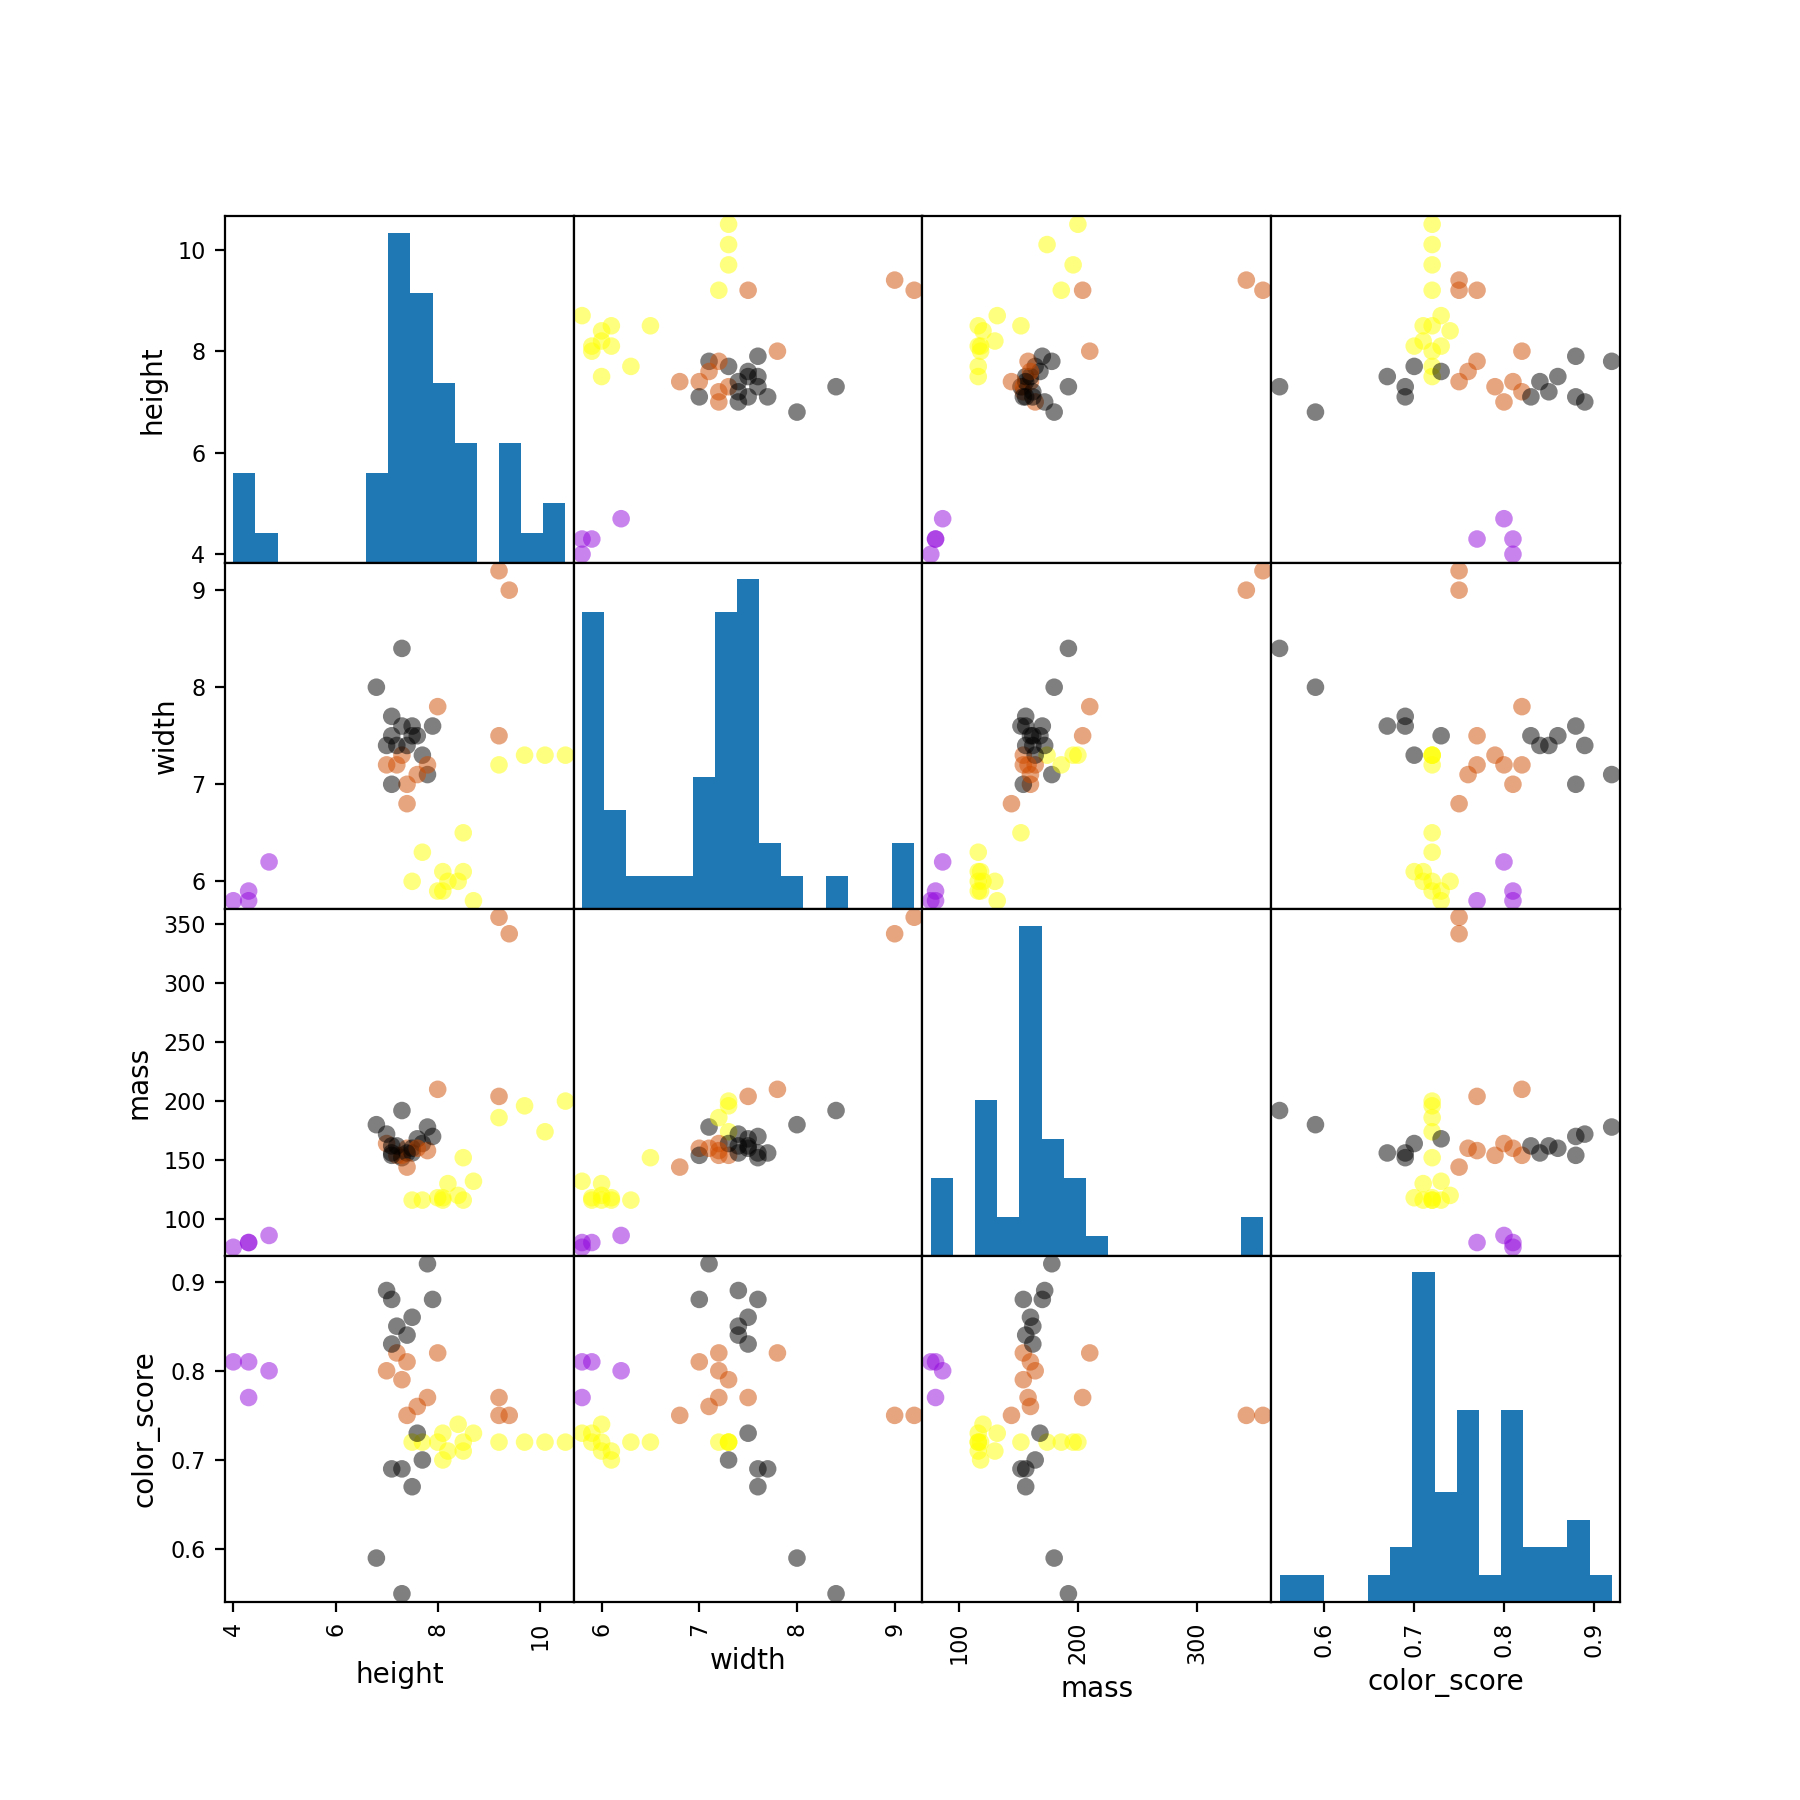

<IPython.core.display.Javascript object>


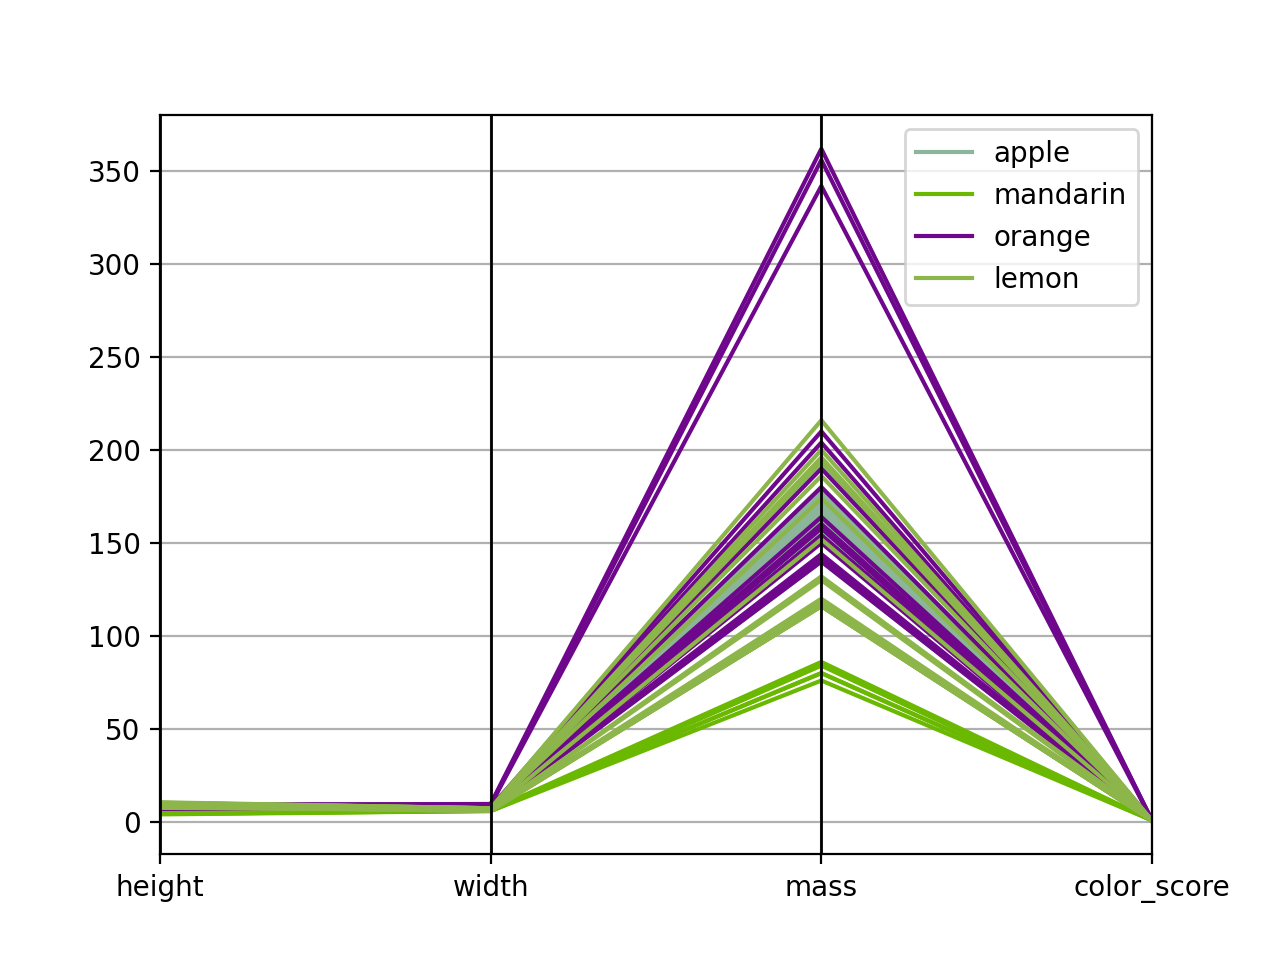

In [137]:
# plotting a scatter matrix
from matplotlib import cm

# Define X=features, Y=Label
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Feature Pair Plot, relationship between 2 features (pair of features)
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)
#scatter = X_train.plot.scatter('height', 'width', c=y_train, colormap='viridis')

# Parallel coordinates Plot
plt.figure()
df = fruits[['height', 'width', 'mass', 'color_score', 'fruit_name']]
pd.plotting.parallel_coordinates(df, 'fruit_name');


<IPython.core.display.Javascript object>


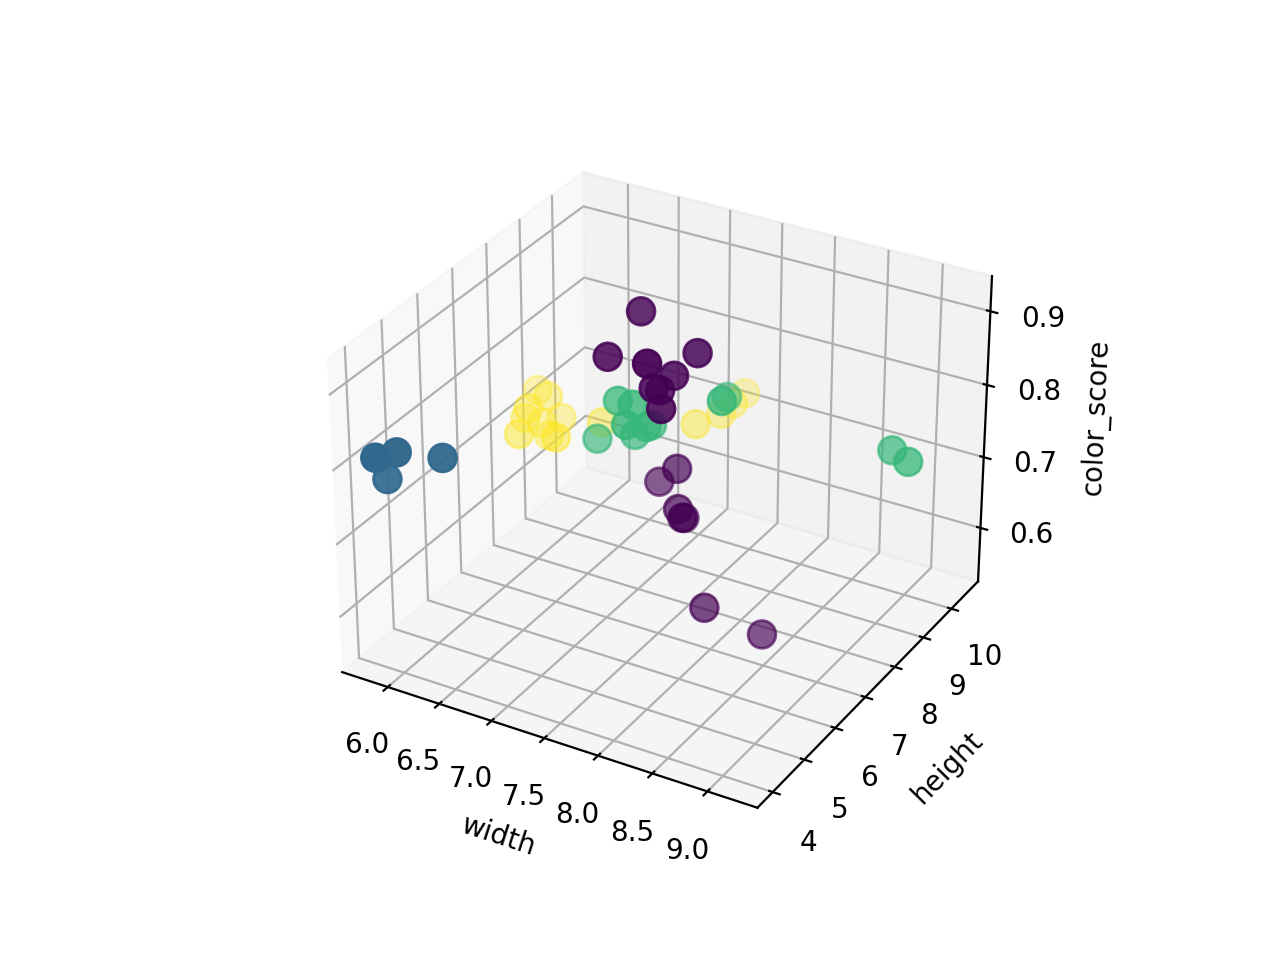

In [138]:
# plotting a 3D scatter plot. 3d relationship between 3 features. Use mouse click to rotats the figure
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

<IPython.core.display.Javascript object>


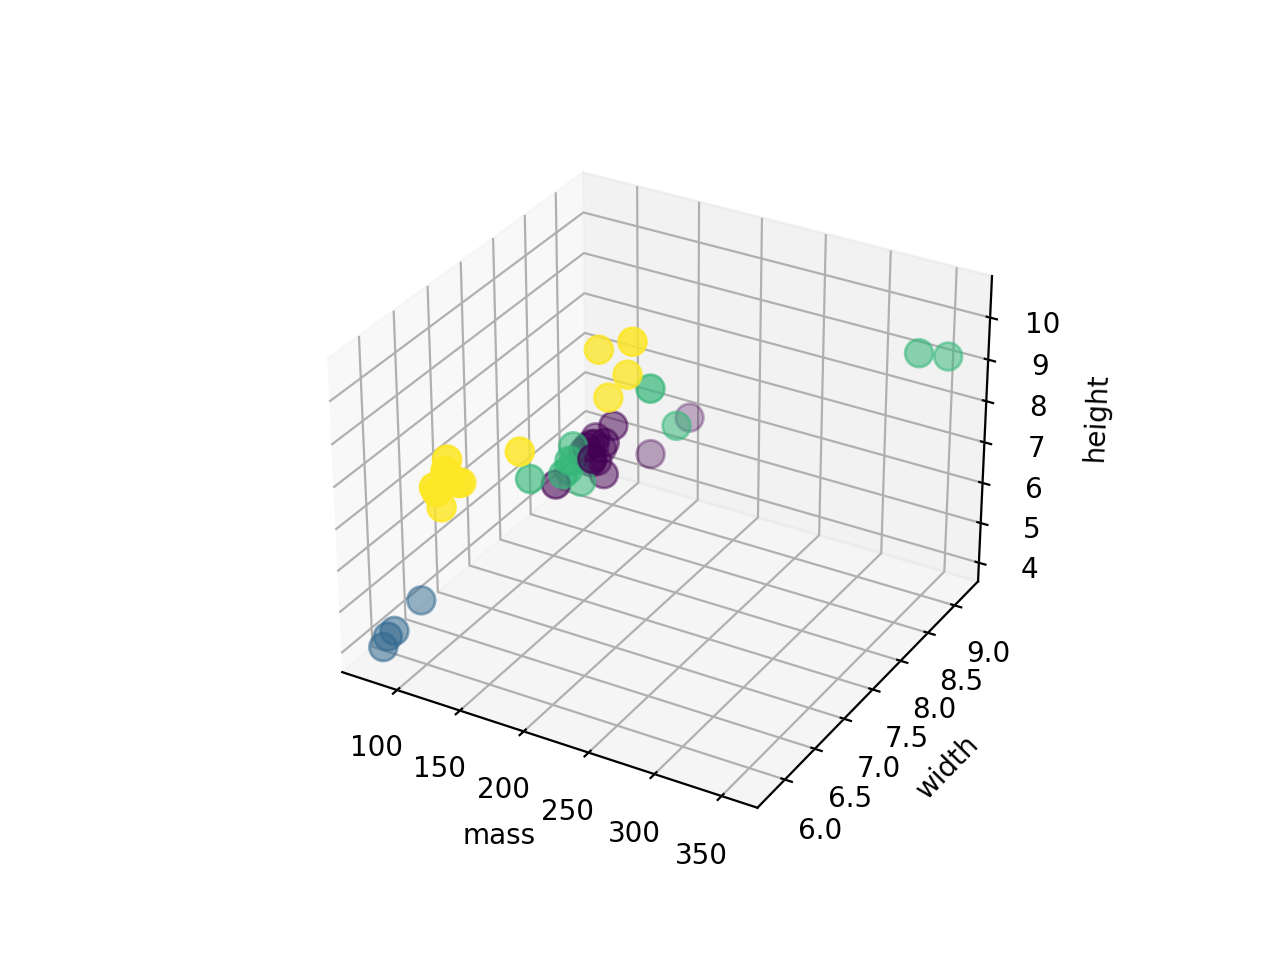

In [139]:
fig = plt.figure();
#X_train['width'].plot.box();
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['mass'], X_train['width'], X_train['height'], c = y_train, marker = 'o', s=100);
ax.set_xlabel('mass')
ax.set_ylabel('width')
ax.set_zlabel('height')
plt.show()

In [164]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]

# Corresponding Labels
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [165]:
# Create classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [166]:
#Train the classifier (fit the estimator) using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [167]:
# Estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)

0.5333333333333333

In [168]:
# Use the trained k-NN classifier model to classify new, previously unseen objects
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [169]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [173]:
fruit_prediction = knn.predict(X_test)
print(fruit_prediction)
for prediction in fruit_prediction:
    print(lookup_fruit_name[prediction])

[3 1 4 4 1 1 3 3 1 4 2 1 3 1 4]
orange
apple
lemon
lemon
apple
apple
orange
orange
apple
lemon
mandarin
apple
orange
apple
lemon
